In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('kyphosis.csv')

In [3]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [6]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


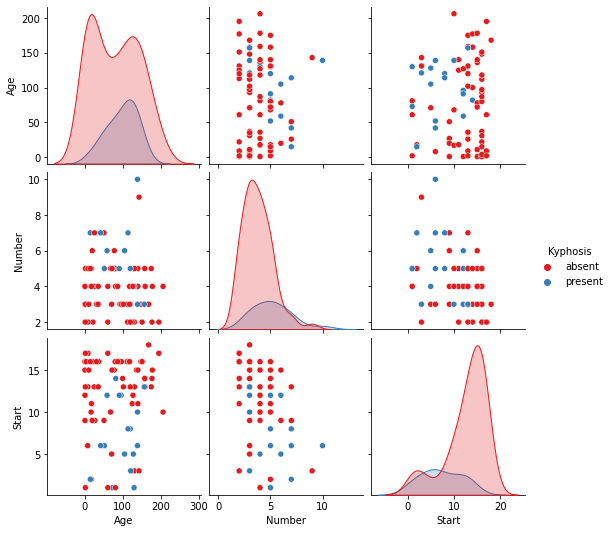

In [7]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions=dtree.predict(X_test)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix

In [11]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.81      0.72      0.76        18
     present       0.44      0.57      0.50         7

    accuracy                           0.68        25
   macro avg       0.63      0.65      0.63        25
weighted avg       0.71      0.68      0.69        25



In [12]:
print(confusion_matrix(y_test,predictions))

[[13  5]
 [ 3  4]]


In [13]:
from IPython.display import Image  
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn import tree
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 


features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

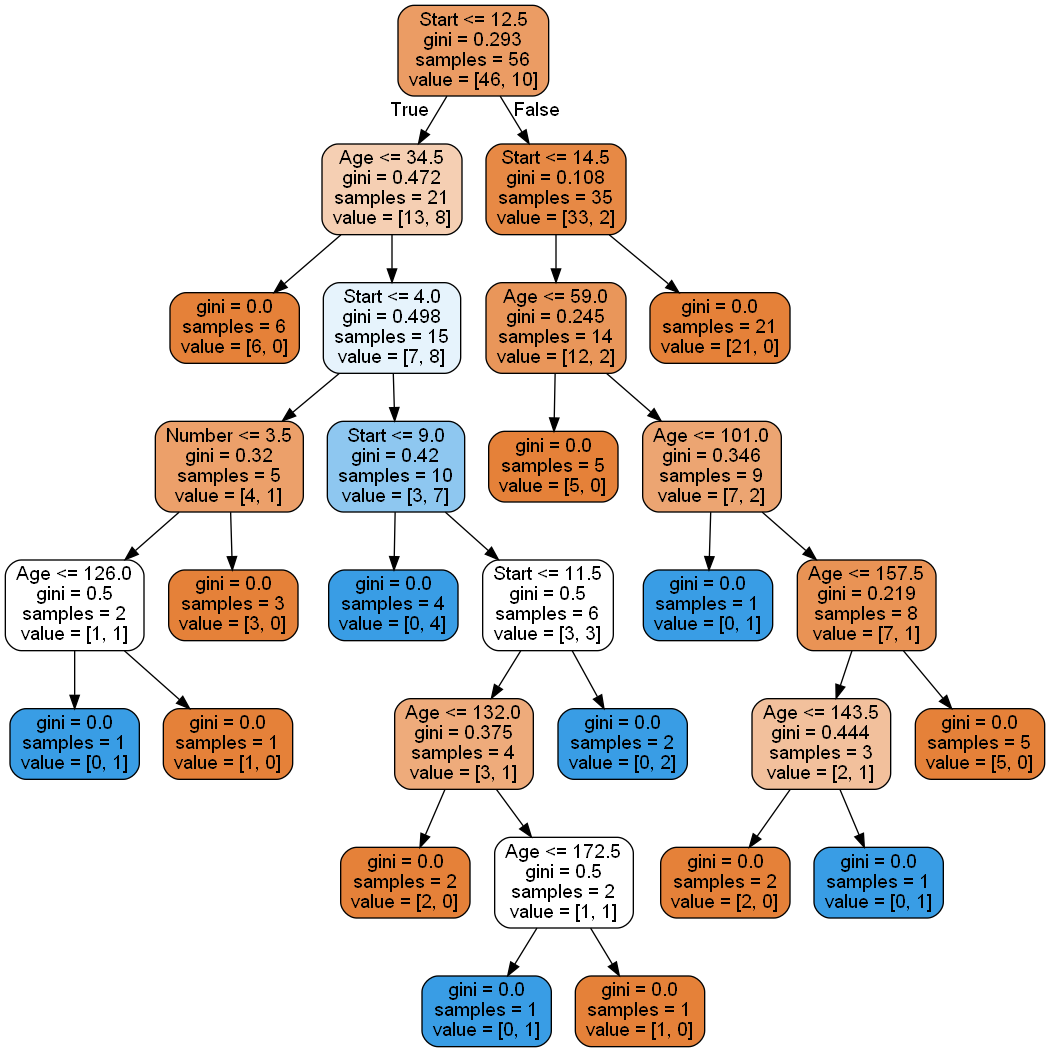

In [14]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Admin/AppData/Roaming/Python/Python39/site-packages/pydot.py'
 
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  